In [2]:
! pip install contextily
! pip install pyproj
! pip install shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.3 MB/s eta 0:00:00


In [56]:
! pip install pandana

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 6.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 3.2 MB/s eta 0:00:00


In [137]:
pip install --upgrade osmnx


Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana 

In [107]:
pois = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/clean_pois_montreal.geojson")


In [108]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [109]:
# calculate the centroid of each POI (as there are some multipolygons in the data, we need to calculate the centroid of each polygon)
pois['geometry'] = pois['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/1972228854.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois['geometry'] = pois['geometry'].centroid


In [110]:
# check crs of the pois
print(pois.crs)   

EPSG:4326


In [111]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [112]:
polygons = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/district_polygons.geojson")

In [113]:
# check crs of the polygons
print(polygons.crs)

EPSG:4326


In [114]:
# calculate the centroid of each polygon of neighborhoods
polygons['centroids'] = polygons['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/3341021584.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['centroids'] = polygons['geometry'].centroid


In [115]:
# create new centroids GeoDataFrame where geometry is the centroid column
centroids = gpd.GeoDataFrame(polygons, geometry='centroids')

# drop geometry column and rename the centroids column to geometry
centroids = centroids.drop(columns='geometry').rename(columns={'centroids': 'geometry'})

In [116]:
# set column named geometry as the active geometry column
centroids = gpd.GeoDataFrame(centroids, geometry='geometry')

In [117]:
centroids.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [118]:

# Assuming `amenities_gdf` is your GeoDataFrame containing amenities with points
# Assuming `neighbourhoods_gdf` is your GeoDataFrame containing neighborhoods with polygons

# Perform spatial join
amenities_with_neighborhood = gpd.sjoin(pois, polygons, how="left", op="within")

# Now `amenities_with_neighborhood` contains a new column 'neighbourhood' 
# which indicates the neighborhood each amenity point falls within


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [119]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)


In [120]:
amenities_with_neighborhood['Arrondissement'].value_counts()

Arrondissement
Ville-Marie                                            1551
Le Plateau-Mont-Royal                                   921
Côte-des-Neiges–Notre-Dame-de-Grâce                     827
Rosemont–La Petite-Patrie                               781
Villeray–Saint-Michel–Parc-Extension                    466
Ahuntsic-Cartierville                                   432
Le Sud-Ouest                                            390
Mercier–Hochelaga-Maisonneuve                           389
Verdun                                                  277
Saint-Laurent                                           248
L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro     190
LaSalle                                                 173
Saint-Léonard                                           151
Rivière-des-Prairies–Pointe-aux-Trembles                119
Outremont                                               116
Lachine                                                 109
Montréal-Nord            

In [121]:

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
# first, we need to create a GeoDataFrame from the centroids
# polygons = polygons.set_index('Arrondissement')
# amenities_with_neighborhood['Arrondissement'] = amenities_with_neighborhood['Arrondissement'].astype(str)
# polygons['Arrondissement'] = polygons['Arrondissement'].astype(str)

# join the centroids to the amenities
# amenities_with_neighborhood = amenities_with_neighborhood.join(polygons, on='Arrondissement', rsuffix='_centroid')

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)

# Now `amenities_with_neighborhood` contains a new column 'distance_to_centroid'
# which indicates the distance between each amenity and the centroid of the neighborhood it falls within

# Now you can filter the amenities based on the distance to the centroid
# For example, to get all amenities within 500 meters of the centroid
# amenities_within_500m = amenities_with_neighborhood[amenities_with_neighborhood['distance_to_centroid'] <= 500]






/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/2634055832.py:11: UserWarning: The indices of the two GeoSeries are different.
  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/2634055832.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)


In [122]:
amenities_with_neighborhood.centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/667464992.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood.centroid


0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Length: 7283, dtype: geometry

In [123]:
amenities_with_neighborhood.geometry

0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Name: geometry, Length: 7283, dtype: geometry

In [124]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids,distance_to_centroid
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.000000
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091483
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.044636
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091192
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.107767


In [125]:
amenities_with_neighborhood['distance_to_centroid'].describe()

count    18.000000
mean      0.066927
std       0.037825
min       0.000000
25%       0.045595
50%       0.070577
75%       0.091411
max       0.132553
Name: distance_to_centroid, dtype: float64

In [126]:
polygons_centroids = amenities_with_neighborhood[['Arrondissement','centroids']].copy()

amenities_with_neighborhood.drop(columns=['centroids'], inplace=True)

amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)

amenities_with_neighborhood['distance_in_m'] = amenities_with_neighborhood['distance_to_centroid']*111195

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/3535840443.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)


In [101]:
len(polygons_centroids)

7283

In [102]:
len(amenities_with_neighborhood)

7283

In [127]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,distance_to_centroid,distance_in_m
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,0.014123,1570.383871
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,0.014546,1617.422492
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,0.006091,677.287252
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,0.006973,775.388307
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,0.007381,820.760929


In [105]:
# create a function to return the shortest distance for each category within each neighborhood
def shortest_distance(df):
    return df.loc[df['distance_to_centroid'].idxmin()]


In [11]:
# following is taken from exercise 10 solutions 

In [128]:
place = 'Montreal, Canada'
G_walk = ox.graph_from_place(place, network_type='walk')

In [167]:
# specify parameters for the analysis
walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [168]:
# set a uniform walking speed on every edge
for u, v, data in G_walk.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk = ox.add_edge_travel_times(G_walk) # this computes the travel time in seconds based on the 'speed_kph' column

In [176]:
# Get all the "fresh food" stores on OSM within the study site
tags = {'restaurant/cafe': ['restaurant']}


amenities = ox.geometries_from_place(place, tags=tags)

amenities = amenities.to_crs('EPSG:25832')

amenities.shape

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_3853/3395595138.py:5: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenities = ox.geometries_from_place(place, tags=tags)


InsufficientResponseError: No data elements in server response. Check log and query location/tags.

In [132]:
amenities.head()

In [133]:
# pois.to_crs('EPSG:25832', inplace=True)

In [134]:
# pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-4969379.074 9203051.669)
1,node,190646563,None,post_box,None,Post,POINT (-4969347.157 9203007.507)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-4968676.240 9204153.871)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-4968547.713 9204118.775)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-4968423.257 9204159.809)


In [163]:
# construct the pandana network
# For this we first need the nodes and edges as geodataframes

G_walk = ox.project_graph(G_walk, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 146028
Setting CH edge vector of size 469352
Range graph removed 474478 edges of 938704
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [164]:
# # Accessing x and y coordinates from the geometry column
# pois_x = pois.geometry.x
# pois_y = pois.geometry.y

# Add POIs to the network
network.set_pois(category='Restaurant/cafe', 
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=pois_x, 
                 y_col=pois_y)

In [165]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-4969379.074 9203051.669)
1,node,190646563,None,post_box,None,Post,POINT (-4969347.157 9203007.507)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-4968676.240 9204153.871)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-4968547.713 9204118.775)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-4968423.257 9204159.809)


In [166]:
network.poi_category_names

['Restaurant/cafes']

In [138]:
centroids = pois.centroid



In [139]:
centroids.head()

0    POINT (-4969379.074 9203051.669)
1    POINT (-4969347.157 9203007.507)
2    POINT (-4968676.240 9204153.871)
3    POINT (-4968547.713 9204118.775)
4    POINT (-4968423.257 9204159.809)
dtype: geometry

In [150]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
# centroids = amenities.centroid

# set the amenities' locations on the network 
network.set_pois(category=pois['Restaurant/cafe'],
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)


KeyError: 'Restaurant/cafe'

In [158]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Restaurant/cafe',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
26232418,9,9,9
1653821632,4,5,13
11322670493,3,3,14
11340718245,4,12,12
11340718237,5,5,5


The `distances` dataframe contains the osmid of each node and the distance in seconds to the three closest amenities (based on our provided walking speed).

OSMnx works with travel distances in seconds, but let's convert it to minutes for a more meaningful value:

In [159]:
distances['travel_time'] = distances[1] / 60

In [160]:
distances

,1,2,3,travel_time
osmid,,,,
26232418,9.000000,9.000000,9.100000,0.150000
1653821632,4.900000,5.900000,13.700000,0.081667
11322670493,3.500000,3.500000,14.000000,0.058333
11340718245,4.900000,12.600000,12.600000,0.081667
11340718237,5.200000,5.200000,5.800000,0.086667
...,...,...,...,...
11837611683,43.099998,43.099998,103.599998,0.718333
11837611736,148.600006,231.899994,240.600006,2.476667
11837611738,181.500000,264.799988,273.500000,3.025000


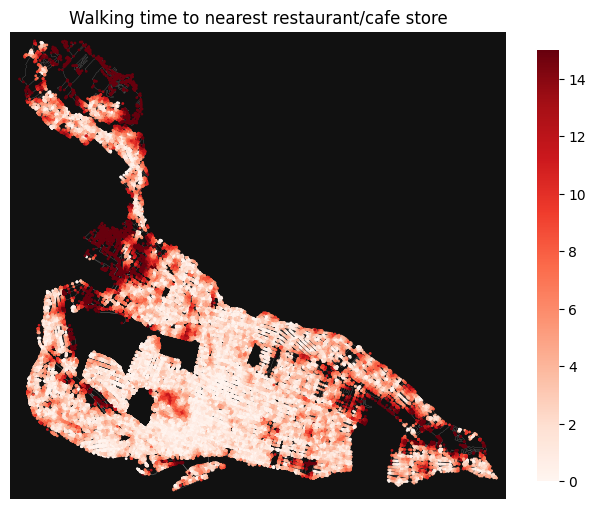

In [161]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest restaurant/cafe store')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')


In [145]:

# set the amenities' locations on the network 
network.set_pois(category='Health care',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [146]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Health care',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
26232418,9,9,9
1653821632,4,5,13
11322670493,3,3,14
11340718245,4,12,12
11340718237,5,5,5


In [147]:
distances['travel_time'] = distances[1] / 60

In [149]:
distances

,1,2,3,travel_time
osmid,,,,
26232418,9.000000,9.000000,9.100000,0.150000
1653821632,4.900000,5.900000,13.700000,0.081667
11322670493,3.500000,3.500000,14.000000,0.058333
11340718245,4.900000,12.600000,12.600000,0.081667
11340718237,5.200000,5.200000,5.800000,0.086667
...,...,...,...,...
11837611683,43.099998,43.099998,103.599998,0.718333
11837611736,148.600006,231.899994,240.600006,2.476667
11837611738,181.500000,264.799988,273.500000,3.025000


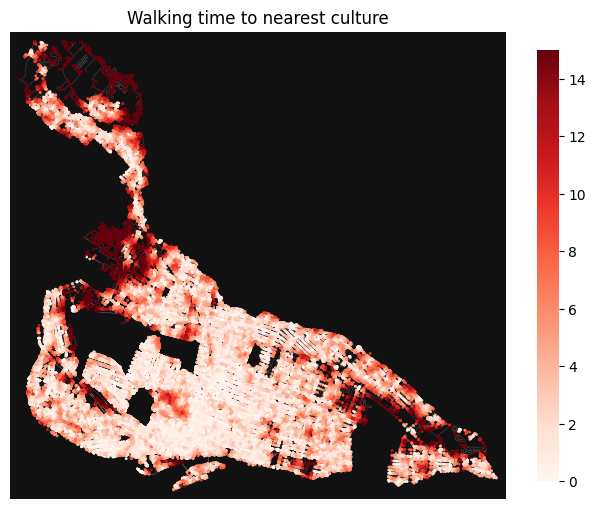

In [148]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest culture')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')